In [8]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [9]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

### Reset Seed agar Reproducible

In [10]:
def reset_seeds(seed=42):
    import random as python_random
    import numpy as np
    import tensorflow as tf

    python_random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

### Variasi 1

<p>
Spesifikasi:<br/>
1 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
1 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [11]:
reset_seeds()
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3751 - loss: 1.7391 - val_accuracy: 0.5509 - val_loss: 1.2830
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5551 - loss: 1.2702 - val_accuracy: 0.5886 - val_loss: 1.1859
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5970 - loss: 1.1520 - val_accuracy: 0.6056 - val_loss: 1.1311
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6272 - loss: 1.0681 - val_accuracy: 0.6181 - val_loss: 1.0893
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6523 - loss: 0.9993 - val_accuracy: 0.6285 - val_loss: 1.0728
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6740 - loss: 0.9409 - val_accuracy: 0.6376 - val_loss: 1.0560
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6933 - loss: 0.8905 - val_accuracy: 0.6416 - val_loss: 1.0478
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7070 - loss: 0.8459 - val_accuracy: 0.

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [12]:
reset_seeds()
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3309 - loss: 1.8225 - val_accuracy: 0.5310 - val_loss: 1.3196
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5348 - loss: 1.3052 - val_accuracy: 0.5905 - val_loss: 1.1736
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5874 - loss: 1.1654 - val_accuracy: 0.6192 - val_loss: 1.0975
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6238 - loss: 1.0729 - val_accuracy: 0.6408 - val_loss: 1.0417
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6474 - loss: 1.0093 - val_accuracy: 0.6491 - val_loss: 1.0123
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6652 - loss: 0.9587 - val_accuracy: 0.6563 - val_loss: 0.9934
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6798 - loss: 0.9172 - val_accuracy: 0.6597 - val_loss: 0.9800
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6926 - loss: 0.8788 - val_accuracy: 0.

### Variasi 3

<p>
Spesifikasi:<br/>
3 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [13]:
reset_seeds()
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2729 - loss: 1.9453 - val_accuracy: 0.4811 - val_loss: 1.4470
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4780 - loss: 1.4401 - val_accuracy: 0.5350 - val_loss: 1.2977
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5331 - loss: 1.3045 - val_accuracy: 0.5665 - val_loss: 1.2196
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5656 - loss: 1.2190 - val_accuracy: 0.5910 - val_loss: 1.1589
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5908 - loss: 1.1563 - val_accuracy: 0.6077 - val_loss: 1.1192
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6108 - loss: 1.1034 - val_accuracy: 0.6211 - val_loss: 1.0873
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6267 - loss: 1.0573 - val_accuracy: 0.6276 - val_loss: 1.0678
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6408 - loss: 1.0224 - val_accuracy: 0.

In [14]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1000
           1       0.78      0.75      0.76      1000
           2       0.49      0.48      0.49      1000
           3       0.43      0.47      0.45      1000
           4       0.62      0.54      0.58      1000
           5       0.43      0.68      0.53      1000
           6       0.75      0.69      0.72      1000
           7       0.81      0.59      0.68      1000
           8       0.72      0.72      0.72      1000
           9       0.78      0.64      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000

Macro F1-score: 0.6304


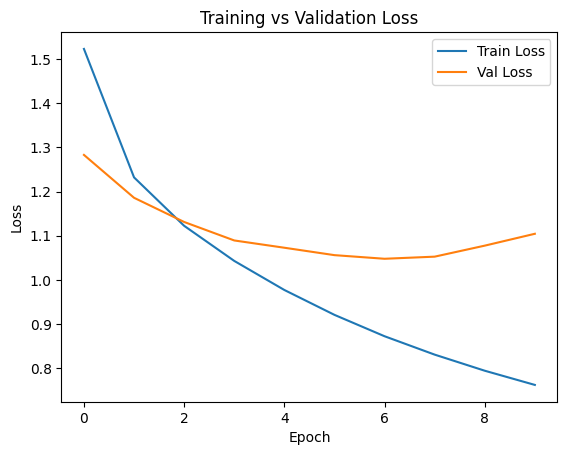

0.6304042730312911

In [15]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.82      0.77      0.79      1000
           2       0.47      0.65      0.55      1000
           3       0.52      0.46      0.49      1000
           4       0.64      0.56      0.60      1000
           5       0.67      0.46      0.54      1000
           6       0.74      0.77      0.75      1000
           7       0.69      0.75      0.72      1000
           8       0.76      0.76      0.76      1000
           9       0.78      0.71      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

Macro F1-score: 0.6658


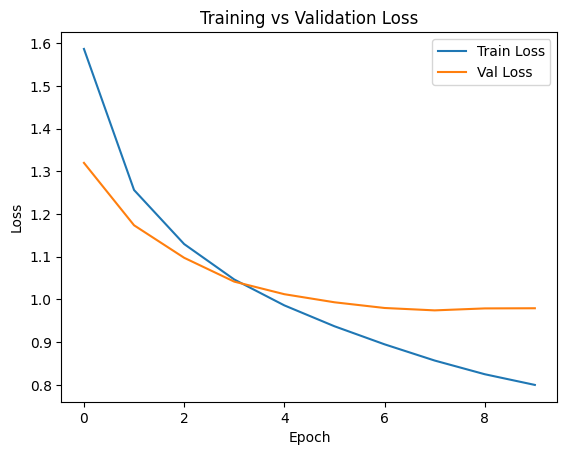

0.6657820808392697

In [16]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      1000
           1       0.78      0.79      0.78      1000
           2       0.54      0.53      0.53      1000
           3       0.43      0.45      0.44      1000
           4       0.60      0.56      0.58      1000
           5       0.64      0.46      0.53      1000
           6       0.69      0.77      0.72      1000
           7       0.69      0.71      0.70      1000
           8       0.76      0.74      0.75      1000
           9       0.74      0.73      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

Macro F1-score: 0.6450


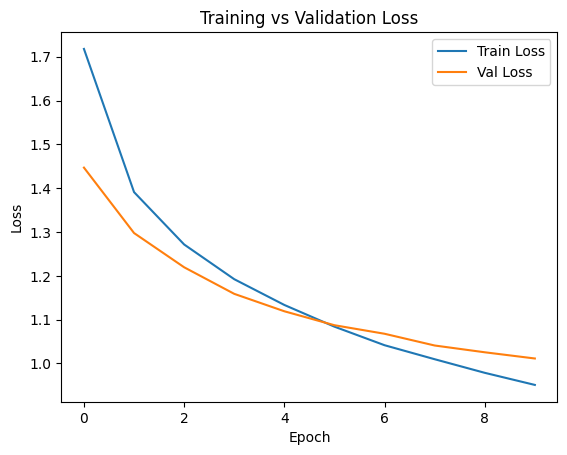

0.64502385937434

In [17]:
evaluate_model(model_3, x_test, y_test, history_3)